(geom_series)=
```{raw} jupyter
<div id="qe-notebook-header" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>
```

```{index} single: python
```

# 基础经济学中的几何级数
## 概述
本讲座描述了使用几何级数数学的重要经济学概念。
其中包括：
- 凯恩斯主义的**乘数**
- 在部分准备金银行系统中普遍存在的货币**乘数**
- 资产支付流的利率和现值
（如我们下面将看到的，术语**乘数**实际上意味着**收敛几何级数的和**）
这些应用和其他应用证实了这句俏皮话的真实性：

```{epigraph}
"在经济学中，一点几何级数的知识就能走很远"
```

以下我们将使用这些导入：

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #设置默认的图像大小
import numpy as np
import sympy as sym
from sympy import init_printing
from matplotlib import cm

## 关键公式

首先，让 $c$ 是一个严格介于 $-1$ 和 $1$ 之间的实数。

- 我们通常写作 $c \in (-1,1)$。
- 这里 $(-1,1)$ 表示所有严格小于 $1$ 且严格大于 $-1$ 的实数的集合。
- 符号 $\in$ 的意思是 *属于* 或 *属于符号后面的集合*。

我们想要评估两种类型的几何级数——无限和有限。

### 无限几何级数

我们感兴趣的第一种几何级数是无限级数

$$
1 + c + c^2 + c^3 + \cdots
$$

其中 $\cdots$ 表示级数无穷无尽地继续。

关键公式是

```{math}
:label: infinite
1 + c + c^2 + c^3 + \cdots = \frac{1}{1 -c }
```

为了证明关键公式 {eq}`infinite`，将两边乘以 $(1-c)$ 并验证如果 $c \in (-1,1)$，则结果是
方程 $1 = 1$。

### 有限几何级数

我们感兴趣的第二种级数是有限几何级数

$$
1 + c + c^2 + c^3 + \cdots + c^T
$$

其中 $T$ 是一个正整数。

关键公式是

$$
1 + c + c^2 + c^3 + \cdots + c^T  = \frac{1 - c^{T+1}}{1-c}
$$

**备注：** 上述公式适用于任何标量 $c$ 的值。我们不必将 $c$ 限制在
集合 $(-1,1)$ 中。

我们现在继续描述一些几何级数的著名经济应用。

## 示例：部分准备金银行制度中的货币乘数

在部分准备金银行制度中，银行仅持有每张 **存款凭证** 背后的现金的一部分 $r \in (0,1)$

* 近年来
    - 现金是由政府发行的纸币，称为美元或英镑或 $\ldots$
    - *存款* 是支票或储蓄账户中的余额，持有人有权要求银行立即支付现金
* 当英国、法国和美国采用金本位或银本位时（例如1914年之前）
    - 现金是金或银币
    - *存款凭证* 是银行承诺按需兑换成金或银的 *银行票据*；（有时也是支票或储蓄账户余额）

经济学家和金融家通常将 **货币供应量** 定义为经济范围内 **现金** 加 **存款** 的总和。

在 **部分准备金银行制度** 中（其中准备金率 $r$ 满足 $0 < r < 1$），**银行通过发行存款**（由部分准备金加上他们向客户发放的贷款支持）**创造货币**。

几何级数是理解银行如何在部分准备金制度中创造货币（即存款）的关键工具。

几何级数公式 {eq}`infinite` 是经典货币创造过程模型的核心——这一模型引导我们到达著名的 **货币乘数**。

### 一个简单的模型

有一组银行，命名为 $i = 0, 1, 2, \ldots$。

银行 $i$ 的贷款 $L_i$、存款 $D_i$ 和
准备金 $R_i$ 必须满足资产负债表方程（因为
**资产负债表平衡**）：

```{math}
:label: balance

L_i + R_i = D_i
```

上面方程的左侧是银行的 **资产** 之和，
即其未偿还贷款 $L_i$ 加上其现金准备金
$R_i$。

右侧记录了银行 $i$ 的负债，
即其存款人持有的存款 $D_i$；这些是
银行对其存款人的 IOU，以支票
账户或储蓄账户的形式（或在1914年之前，银行发行的
承诺按需兑换成金或银的银行票据）。

每个银行 $i$ 设置其准备金以满足方程

```{math}
:label: reserves

R_i = r D_i
```

其中 $r \in (0,1)$ 是其 **准备金-存款比率** 或简称 **准备金比率**

- 准备金比率由政府设定或由银行
  出于预防原因选择

接下来我们添加一个理论，指出银行 $i+1$ 的存款完全依赖于
银行 $i$ 发放的贷款，即

```{math}
:label: deposits

D_{i+1} = L_i
```

因此，我们可以认为银行按一条线排列，
银行 $i$ 的贷款立即存入 $i+1$

- 这样，银行 $i$ 的债务人变成了
  银行 $i+1$ 的债权人

最后，我们添加一个关于银行
$0$ 存款外生水平的 *初始条件*

$$
D_0 \ \text{ 是外生给定的}
$$

我们可以认为 $D_0$ 是系统中第一个
存款人存入第一个银行（即银行编号 $i=0$）的现金量。

现在我们做一些代数运算。

结合方程 {eq}`balance` 和 {eq}`reserves` 告诉我们

```{math}
:label: fraction

L_i = (1-r) D_i
```

这表明银行 $i$ 贷款其
存款的一部分 $(1-r)$ 并保留一部分 $r$ 作为现金准备金。

结合方程 {eq}`fraction` 和方程 {eq}`deposits` 告诉我们

$$
D_{i+1} = (1-r) D_i  \ \text{ 对 } i \geq 0
$$

这意味着

```{math}
:label: geomseries

D_i = (1 - r)^i D_0  \ \text{ 对 } i \geq 0
```

方程 {eq}`geomseries` 表示 $D_i$ 是
几何级数 $D_0$ 和

$$
1, (1-r), (1-r)^2, \cdots
$$

的第 $i$ 项的乘积。

因此，我们银行系统中所有存款的总和
$i=0, 1, 2, \ldots$ 是

```{math}
:label: sumdeposits

\sum_{i=0}^\infty (1-r)^i D_0 =  \frac{D_0}{1 - (1-r)} = \frac{D_0}{r}
```
### 货币乘数

**货币乘数** 是一个数字，表示向银行 $0$ 注入外生现金导致银行系统总存款增加的乘数因子。

方程 {eq}`sumdeposits` 断言 **货币乘数** 是 $\frac{1}{r}$

- 在银行 $0$ 初始存入现金 $D_0$ 导致银行系统创造总存款 $\frac{D_0}{r}$。
- 初始存款 $D_0$ 作为准备金持有，按照 $D_0 = \sum_{i=0}^\infty R_i$ 分布在整个银行系统中。

## 示例：凯恩斯乘数

著名经济学家约翰·梅纳德·凯恩斯及其追随者创建了一个简单模型，旨在确定国民收入 $y$ 在以下情况下：

- 存在大量失业资源，特别是 **劳动力和资本的过剩供给**
- 价格和利率未能调整以使总 **供给等于需求**（例如，价格和利率被冻结）
- 国民收入完全由总需求决定

### 静态版本

一个基本的凯恩斯国民收入决定模型由描述 $y$ 的总需求及其组成部分的三个方程组成。

第一个方程是一个国民收入恒等式，断言消费 $c$ 加上投资 $i$ 等于国民收入 $y$：

$$
c + i = y
$$

第二个方程是一个凯恩斯消费函数，断言人们消费其收入的一部分 $b \in (0,1)$：

$$
c = b y
$$

部分 $b \in (0,1)$ 称为 **边际消费倾向**。

部分 $1-b \in (0,1)$ 称为 **边际储蓄倾向**。

第三个方程简单地说明投资在水平 $i$ 是外生的。

- *外生* 意味着 *在此模型之外确定*。

将第二个方程代入第一个方程得到 $(1-b) y = i$。

求解这个方程得到

$$
y = \frac{1}{1-b} i
$$

数量 $\frac{1}{1-b}$ 称为 **投资乘数** 或简称 **乘数**。

应用无限几何级数的求和公式，我们可以将上述方程写为

$$
y = i \sum_{t=0}^\infty b^t
$$

其中 $t$ 是一个非负整数。

因此，我们得出乘数的以下等效表达式：

$$
\frac{1}{1-b} = \sum_{t=0}^\infty b^t
$$

表达式 $\sum_{t=0}^\infty b^t$ 激发了对乘数作为我们接下来描述的动态过程结果的解释。

### 动态版本

我们通过将非负整数 $t$ 解释为时间索引并改变消费函数的规范以考虑时间因素，得出动态版本

- 我们增加了收入影响消费的一个时期的滞后

我们设 $c_t$ 为时间 $t$ 的消费，$i_t$ 为
时间 $t$ 的投资。

我们修改消费函数，使其形式为

$$
c_t = b y_{t-1}
$$

这样 $b$ 就是上一期收入的边际消费倾向。

我们从一个初始条件开始，说明

$$
y_{-1} = 0
$$

我们还假设

$$
i_t = i \ \ \textrm {对所有 }  t \geq 0
$$

这样投资随时间保持不变。

因此

$$
y_0 = i + c_0 = i + b y_{-1} =  i
$$

以及

$$
y_1 = c_1 + i = b y_0 + i = (1 + b) i
$$

以及

$$
y_2 = c_2 + i = b y_1 + i = (1 + b + b^2) i
$$

更一般地

$$
y_t = b y_{t-1} + i = (1+ b + b^2 + \cdots + b^t) i
$$

或者

$$
y_t = \frac{1-b^{t+1}}{1 -b } i
$$

显然，当 $t \rightarrow + \infty$ 时，

$$
y_t \rightarrow \frac{1}{1-b} i
$$

**备注 1：** 上述公式通常用于断言在时间 $0$ 投资增加 $\Delta i$ 引发的动态过程，使国民收入按连续金额增加

$$
\Delta i, (1 + b )\Delta i, (1+b + b^2) \Delta i , \cdots
$$

在时间 $0, 1, 2, \ldots$。

**备注 2** 设 $g_t$ 为政府支出的外生序列。

如果我们将模型推广，使国民收入恒等式变为

$$
c_t + i_t + g_t  = y_t
$$

那么前述论证的一个版本表明 **政府支出乘数** 也是 $\frac{1}{1-b}$，因此政府支出的永久增加最终导致国民收入增加，等于乘数乘以政府支出的增加。

## 示例：利率和现值

我们可以应用几何级数公式来研究利率如何影响延续一段时间的美元支付流的价值。

我们在离散时间工作，并假设 $t = 0, 1, 2, \ldots$ 表示时间。

我们设 $r \in (0,1)$ 为一个时期的 **净名义利率**

- 如果名义利率是 $5$ 百分比，
  那么 $r= .05$

一个时期的 **总名义利率** $R$ 定义为

$$
R = 1 + r \in (1, 2)
$$

- 如果 $r=.05$，那么 $R = 1.05$

**备注：** 总名义利率 $R$ 是一个 **汇率** 或 **相对价格**，表示在时间 $t$ 和 $t+1$ 之间的美元。$R$ 的单位是时间 $t+1$ 的美元每时间 $t$ 的美元。

当人们借贷时，他们用现在的美元换取以后的美元，或者用以后的美元换取现在的美元。

这些交换发生的价格是总名义利率。

- 如果我今天卖给你 $x$ 美元，你明天支付我 $R x$
  美元。
- 这意味着你以总利率 $R$ 和净利率 $r$ 向我借了 $x$ 美元。

我们假设净名义利率 $r$ 随时间固定，因此 $R$ 是时间 $t=0, 1, 2, \ldots$ 的总名义利率。

两个重要的几何序列是

```{math}
:label: geom1

1, R, R^2, \cdots
```

和

```{math}
:label: geom2

1, R^{-1}, R^{-2}, \cdots
```

序列 {eq}`geom1` 告诉我们投资的美元价值如何随时间 **累积**。

序列 {eq}`geom2` 告诉我们如何 **折现** 未来的美元以获得其以今天的美元计的价值。

### 累积

几何序列 {eq}`geom1` 告诉我们一美元投资并再投资于一个项目，其总名义回报率如何累积

- 这里我们假设净利息支付再投资于项目
- 因此，时间 $0$ 投资的 $1$ 美元在一个时期后支付利息
  $r$ 美元，所以我们在时间 $1$ 有 $r+1 = R$
  美元
- 在时间 $1$ 我们再投资 $1+r =R$ 美元，并在时间 $2$ 收到利息
  $r R$ 美元加上 *本金*
  $R$ 美元，所以我们在第 $2$ 期末收到 $r R + R = (1+r)R = R^2$
  美元
- 依此类推

显然，如果我们在时间 $0$ 投资 $x$ 美元并
再投资收益，那么序列

$$
x , xR , x R^2, \cdots
$$

告诉我们账户在时间 $t=0, 1, 2, \ldots$ 的累积情况。

### 折现

几何序列 {eq}`geom2` 告诉我们未来的美元在今天的美元中的价值。

记住 $R$ 的单位是时间 $t+1$ 的美元每
时间 $t$ 的美元。

因此

- $R^{-1}$ 的单位是时间 $t$ 的美元每时间 $t+1$ 的美元
- $R^{-2}$ 的单位是时间 $t$ 的美元每时间 $t+2$ 的美元
- 依此类推；$R^{-j}$ 的单位是时间 $t$ 的美元每
  时间 $t+j$ 的美元

所以如果某人在时间 $t+j$ 拥有 $x$ 美元的债权，
那么它在时间 $t$（例如今天）值 $x R^{-j}$ 美元。

### 资产定价的应用

一个 **租赁** 需要在时间 $t = 0, 1, 2, \ldots$ 支付
$x_t$ 美元，其中

$$
x_t = G^t x_0
$$

其中 $G = (1+g)$ 且 $g \in (0,1)$。

因此，租赁支付每期增加 $g$ 百分比。

由于一个即将揭示的原因，我们假设 $G < R$。

租赁的 **现值** 是

$$
\begin{aligned} p_0  & = x_0 + x_1/R + x_2/(R^2) + \cdots \\
                 & = x_0 (1 + G R^{-1} + G^2 R^{-2} + \cdots ) \\
                 & = x_0 \frac{1}{1 - G R^{-1}} \end{aligned}
$$

最后一行使用了无限几何级数的公式。

回想一下 $R = 1+r$ 和 $G = 1+g$ 并且 $R > G$
和 $r > g$ 并且 $r$ 和 $g$ 通常是小
数，例如 .05 或 .03。

使用 $r=0$ 附近的 $\frac{1}{1+r}$ 的泰勒级数，
即，

$$
\frac{1}{1+r} = 1 - r + r^2 - r^3 + \cdots
$$

并且 $r$ 很小以近似
$\frac{1}{1+r} \approx 1 - r$。

使用此近似来写 $p_0$ 为

$$
\begin{aligned}
 p_0 &= x_0 \frac{1}{1 - G R^{-1}} \\
 &= x_0 \frac{1}{1 - (1+g) (1-r) } \\
 &= x_0 \frac{1}{1 - (1+g - r - rg)} \\
 & \approx x_0 \frac{1}{r -g }
\end{aligned}
$$

最后一步使用了近似 $r g \approx 0$。

近似

$$
p_0 = \frac{x_0 }{r -g }
$$

被称为 **戈登公式**，用于当名义
单期利率为 $r$ 且 $r > g$ 时无限支付流 $x_0 G^t$ 的现值或当前价格。

我们还可以扩展资产定价公式，使其适用于有限租赁。

现在让租赁的支付流为 $x_t$，其中 $t= 1,2, \dots,T$，再次

$$
x_t = G^t x_0
$$

该租赁的现值为：

$$
\begin{aligned} \begin{split}p_0&=x_0 + x_1/R  + \dots +x_T/R^T \\ &= x_0(1+GR^{-1}+\dots +G^{T}R^{-T}) \\ &= \frac{x_0(1-G^{T+1}R^{-(T+1)})}{1-GR^{-1}}  \end{split}\end{aligned}
$$

将泰勒级数应用于 $R^{-(T+1)}$ 关于 $r=0$ 我们得到：

$$
\frac{1}{(1+r)^{T+1}}= 1-r(T+1)+\frac{1}{2}r^2(T+1)(T+2)+\dots \approx 1-r(T+1)
$$

类似地，将泰勒级数应用于 $G^{T+1}$ 关于 $g=0$：

$$
(1+g)^{T+1} = 1+(T+1)g+\frac{T(T+1)}{2!}g^2+\frac{(T-1)T(T+1)}{3!}g^3+\dots \approx 1+ (T+1)g
$$

因此，我们得到以下近似值：

$$
p_0 =\frac{x_0(1-(1+(T+1)g)(1-r(T+1)))}{1-(1-r)(1+g) }
$$

展开：

$$
\begin{aligned} p_0 &=\frac{x_0(1-1+(T+1)^2 rg -r(T+1)+g(T+1))}{1-1+r-g+rg}  \\&=\frac{x_0(T+1)((T+1)rg+r-g)}{r-g+rg} \\ &\approx \frac{x_0(T+1)(r-g)}{r-g}+\frac{x_0rg(T+1)}{r-g}\\ &= x_0(T+1) + \frac{x_0rg(T+1)}{r-g}  \end{aligned}
$$

当 $T$ 相对于 $1/(rg)$ 较小时，我们也可以通过去除第二项 $rgx_0(T+1)$ 来近似，以获得有限流近似中的 $x_0(T+1)$。

我们将在 Python 中绘制不同 $T$、$g$ 和 $r$ 值下的真实有限流现值和两个近似值。

首先，我们在下面计算后绘制真实的有限流现值。

In [2]:
# 有限租赁的真实现值
def finite_lease_pv_true(T, g, r, x_0):
    G = (1 + g)
    R = (1 + r)
    return (x_0 * (1 - G**(T + 1) * R**(-T - 1))) / (1 - G * R**(-1))
# 有限租赁的第一次近似

def finite_lease_pv_approx_1(T, g, r, x_0):
    p = x_0 * (T + 1) + x_0 * r * g * (T + 1) / (r - g)
    return p

# 有限租赁的第二次近似
def finite_lease_pv_approx_2(T, g, r, x_0):
    return (x_0 * (T + 1))

# 无限期租赁
def infinite_lease(g, r, x_0):
    G = (1 + g)
    R = (1 + r)
    return x_0 / (1 - G * R**(-1))

现在我们已经定义了我们的函数，我们可以绘制一些结果。

首先，我们研究我们的近似质量。

Font 'default' does not have a glyph for '\u671f' [U+671f], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u4e4b' [U+4e4b], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u73b0' [U+73b0], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u671f' [U+671f], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u4e4b' [U+4e4b], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u73b0' [U+73b0], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.


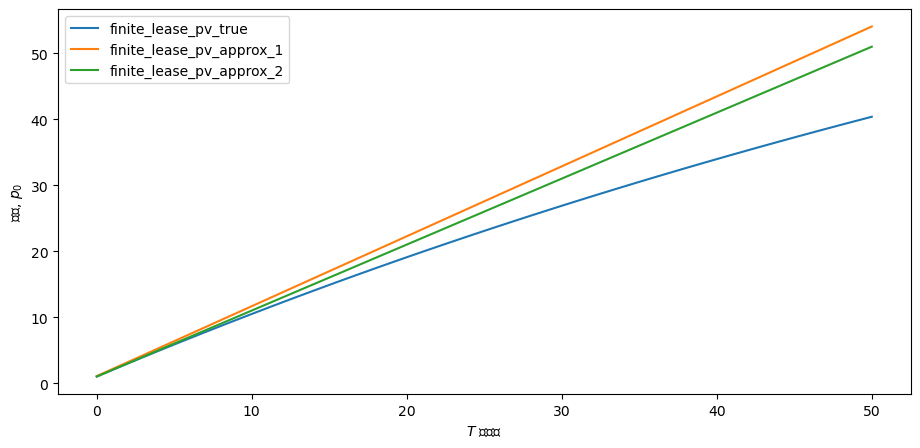

In [3]:
def plot_function(axes, x_vals, func, args):
    axes.plot(x_vals, func(*args), label=func.__name__)

T_max = 50

T = np.arange(0, T_max+1)
g = 0.02
r = 0.03
x_0 = 1

our_args = (T, g, r, x_0)
funcs = [finite_lease_pv_true,
        finite_lease_pv_approx_1,
        finite_lease_pv_approx_2]
        # 三个我们想要比较的函数

fig, ax = plt.subplots()
for f in funcs:
    plot_function(ax, T, f, our_args)
ax.legend()
ax.set_xlabel('$T$ 期之后')
ax.set_ylabel('现值, $p_0$')
plt.show()

显然，我们的近似在 $T$ 的小值时表现良好。

然而，保持 $g$ 和 $r$ 不变，我们的近似在 $T$ 增加时会恶化。

接下来，我们比较不同租赁期限 $T$ 的无限期和有限期租赁现值。

Font 'default' does not have a glyph for '\u671f' [U+671f], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u4e4b' [U+4e4b], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u73b0' [U+73b0], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.


/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31199 (\N{CJK UNIFIED IDEOGRAPH-79DF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36161 (\N{CJK UNIFIED IDEOGRAPH-8D41}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29616 (\N{CJK UNIFIED IDEOGRAPH-73B0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.

Font 'default' does not have a glyph for '\u4e4b' [U+4e4b], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u73b0' [U+73b0], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.


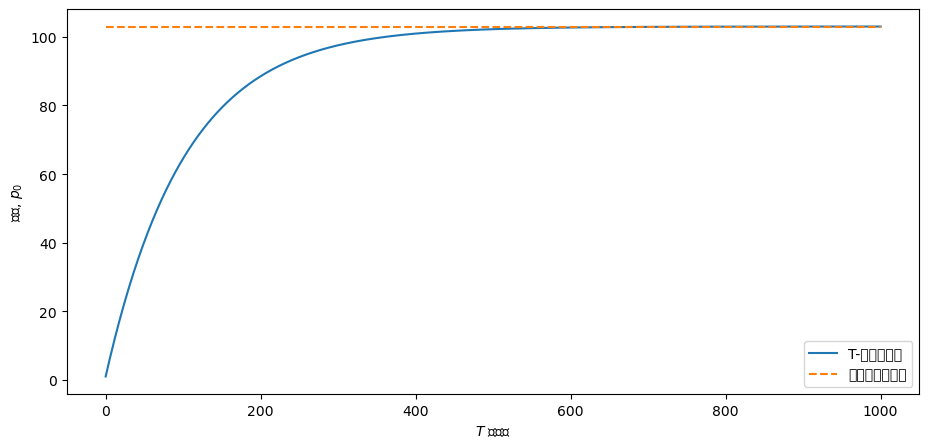

In [4]:
# 无限和有限的收敛性
T_max = 1000
T = np.arange(0, T_max+1)
fig, ax = plt.subplots()
f_1 = finite_lease_pv_true(T, g, r, x_0)
f_2 = np.full(T_max+1, infinite_lease(g, r, x_0))
ax.plot(T, f_1, label='T-期租赁现值')
ax.plot(T, f_2, '--', label='无限期租赁现值')
ax.set_xlabel('$T$ 期之后')
ax.set_ylabel('现值, $p_0$')
ax.legend()
plt.show()

上图显示了当期限 $T \rightarrow +\infty$ 时，期限为 $T$ 的租赁价值接近永久租赁的价值。

现在我们考虑 $r$ 和 $g$ 协变时的两种不同情况。

Font 'default' does not have a glyph for '\u671f' [U+671f], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u4e4b' [U+4e4b], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u73b0' [U+73b0], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u671f' [U+671f], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u4e4b' [U+4e4b], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u540e' [U+540e], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u73b0' [U+73b0], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.


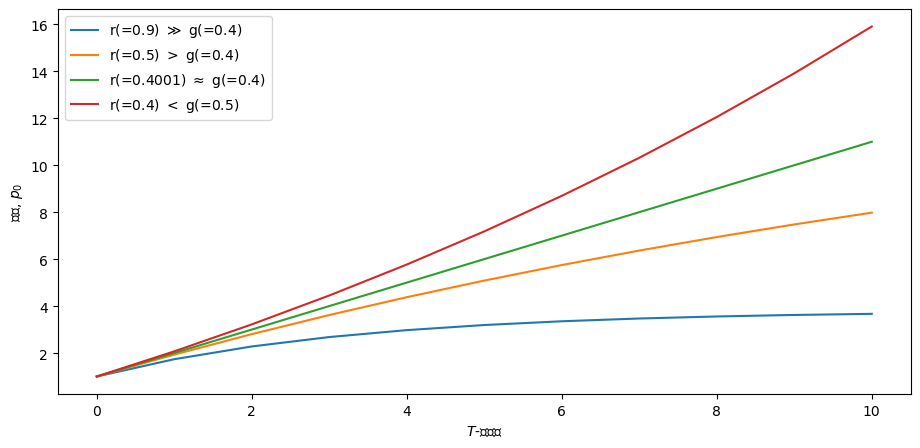

In [5]:
# 第一种情况
# 改变 r 和 g
fig, ax = plt.subplots()
ax.set_ylabel('现值, $p_0$')
ax.set_xlabel('$T$-期之后')
T_max = 10
T=np.arange(0, T_max+1)

rs, gs = (0.9, 0.5, 0.4001, 0.4), (0.4, 0.4, 0.4, 0.5),
comparisons = ('$\gg$', '$>$', r'$\approx$', '$<$')
for r, g, comp in zip(rs, gs, comparisons):
    ax.plot(finite_lease_pv_true(T, g, r, x_0), label=f'r(={r}) {comp} g(={g})')

ax.legend()
plt.show()

此图为为什么条件 $r > g$ 是必要的提供了一个重要提示，如果期限为 $T = +\infty$ 的租赁要有有限的价值。

对于喜欢 3D 图表的粉丝来说，以下图表也能说明同样的观点。

如果你不喜欢 3D 图表，可以跳过下一个可视化！

Font 'default' does not have a glyph for '\u73b0' [U+73b0], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u73b0' [U+73b0], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u503c' [U+503c], substituting with a dummy symbol.


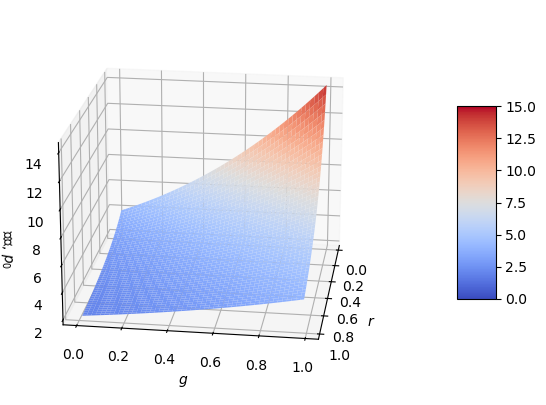

In [6]:
# 第二种情况
fig = plt.figure(figsize = [16, 5])
T = 3
ax = plt.subplot(projection='3d')
r = np.arange(0.01, 0.99, 0.005)
g = np.arange(0.011, 0.991, 0.005)

rr, gg = np.meshgrid(r, g)
z = finite_lease_pv_true(T, gg, rr, x_0)

# 移除未定义的点
same = (rr == gg)
z[same] = np.nan
surf = ax.plot_surface(rr, gg, z, cmap=cm.coolwarm,
    antialiased=True, clim=(0, 15))
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$r$')
ax.set_ylabel('$g$')
ax.set_zlabel('现值, $p_0$')
ax.view_init(20, 8)
plt.show()

我们可以用一些微积分来研究租赁现值 $p_0$ 如何随 $r$ 和 $g$ 变化。

我们将使用一个名为 SymPy 的库。

SymPy 使我们能够进行符号数学计算，包括计算代数方程的导数。

我们将通过创建一个符号表达式来说明它的工作原理，该表达式表示我们无限期租赁的现值公式。

之后，我们将使用 SymPy 来计算导数。

In [7]:
# 创建可用于代数表达式的代数符号
g, r, x0 = sym.symbols('g, r, x0')
G = (1 + g)
R = (1 + r)
p0 = x0 / (1 - G * R**(-1))
init_printing(use_latex='mathjax')
print('我们的公式是：')
p0

我们的公式是：


     x₀    
───────────
  g + 1    
- ───── + 1
  r + 1    

In [8]:
print('dp0 / dg 为：')
dp_dg = sym.diff(p0, g)
dp_dg

dp0 / dg 为：


          x₀          
──────────────────────
                     2
        ⎛  g + 1    ⎞ 
(r + 1)⋅⎜- ───── + 1⎟ 
        ⎝  r + 1    ⎠ 

In [9]:
print('dp0 / dr 为：')
dp_dr = sym.diff(p0, r)
dp_dr

dp0 / dr 为：


      -x₀⋅(g + 1)      
───────────────────────
                      2
       2 ⎛  g + 1    ⎞ 
(r + 1) ⋅⎜- ───── + 1⎟ 
         ⎝  r + 1    ⎠ 

我们可以看到，只要 $r>g$，$r>0$ 且 $g>0$ 并且 $x_0$ 为正，$\frac{\partial p_0}{\partial r}<0$，所以 $\frac{\partial p_0}{\partial r}$ 将始终为负。

同样地，只要 $r>g$，$r>0$ 且 $g>0$ 并且 $x_0$ 为正，$\frac{\partial p_0}{\partial g}>0$，所以 $\frac{\partial p_0}{\partial g}$ 将始终为正。

## 回到凯恩斯乘数

现在我们将回到凯恩斯乘数的情况，并绘制 $y_t$ 的时间路径，假设消费是国民收入的一个常数比例，投资是固定的。

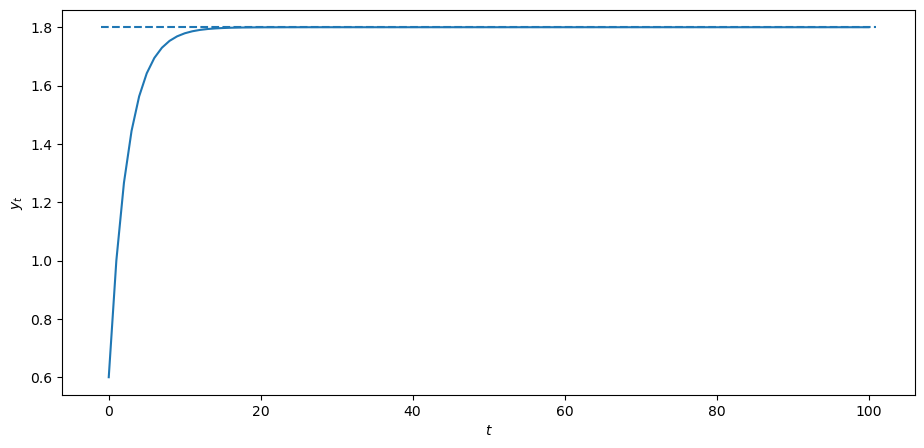

In [10]:
# 计算 $y$ 路径的函数
def calculate_y(i, b, g, T, y_init):
    y = np.zeros(T+1)
    y[0] = i + b * y_init + g
    for t in range(1, T+1):
        y[t] = b * y[t-1] + i + g
    return y

# 初始值
i_0 = 0.3
g_0 = 0.3
# 2/3 的收入为消费
b = 2/3
y_init = 0
T = 100

fig, ax = plt.subplots()
ax.set_xlabel('$t$')
ax.set_ylabel('$y_t$')
ax.plot(np.arange(0, T+1), calculate_y(i_0, b, g_0, T, y_init))
# Output predicted by geometric series
ax.hlines(i_0 / (1 - b) + g_0 / (1 - b), xmin=-1, xmax=101, linestyles='--')
plt.show()

在这个模型中，收入随着时间的推移而增长，直到逐渐收敛到收入的无限几何级数和。

现在我们来研究如果我们改变所谓的**边际消费倾向**，即消费的收入比例，会发生什么。

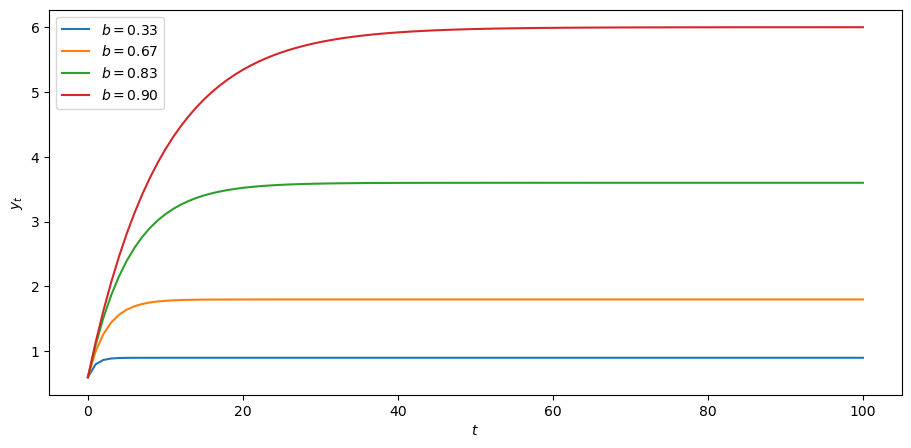

In [11]:
bs = (1/3, 2/3, 5/6, 0.9)

fig,ax = plt.subplots()
ax.set_ylabel('$y_t$')
ax.set_xlabel('$t$')
x = np.arange(0, T+1)
for b in bs:
    y = calculate_y(i_0, b, g_0, T, y_init)
    ax.plot(x, y, label=r'$b=$'+f"{b:.2f}")
ax.legend()
plt.show()

增加边际消费倾向 $b$ 会增加随时间推移的产出路径。

现在我们将比较投资和政府支出增加对产出的影响。

/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20135 (\N{CJK UNIFIED IDEOGRAPH-4EA7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22686 (\N{CJK UNIFIED IDEOGRAPH-589E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21152 (\N{CJK UNIFIED IDEOGRAPH-52A0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.

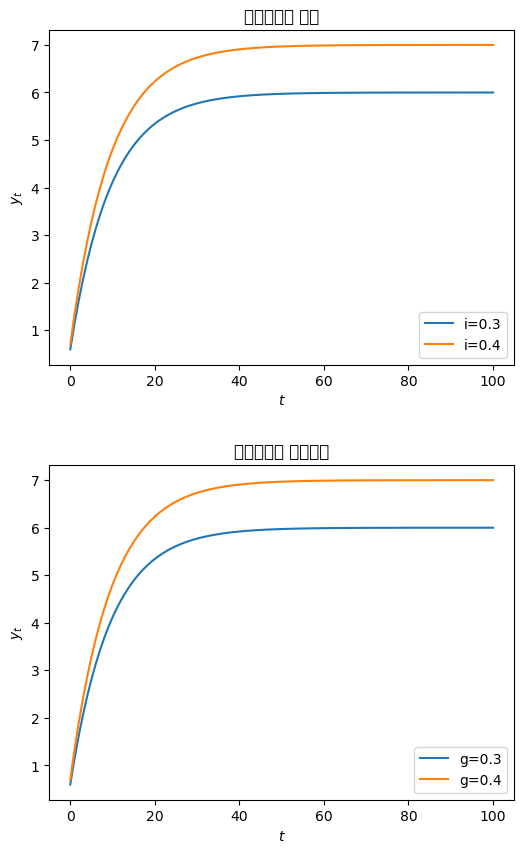

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 10))
fig.subplots_adjust(hspace=0.3)

x = np.arange(0, T+1)
values = [0.3, 0.4]

for i in values:
    y = calculate_y(i, b, g_0, T, y_init)
    ax1.plot(x, y, label=f"i={i}")
for g in values:
    y = calculate_y(i_0, b, g, T, y_init)
    ax2.plot(x, y, label=f"g={g}")

axes = ax1, ax2
param_labels = "投资", "政府支出"
for ax, param in zip(axes, param_labels):
    ax.set_title(f'产出增加了 {param}')
    ax.legend(loc ="lower right")
    ax.set_ylabel('$y_t$')
    ax.set_xlabel('$t$')
plt.show()

请注意，无论政府支出从 0.3 增加到 0.4，还是投资从 0.3 增加到 0.4，图表中的变化都是相同的。